# Assignment Task
## Perform PCA  on 50 Startups and get the best model using the following algorithms
### 1. Linear Regression
### 2. Linear SVR
### 3. Random Forest Regressor

In [354]:
#Importing libraries
import numpy as np
import pandas as pd

In [355]:
#Loading dataset
df = pd.read_csv('50_Startups.csv')
df.head()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [356]:
df.info()  # - Indicates that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [357]:
df.describe() #Indicates that there are no outliers

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


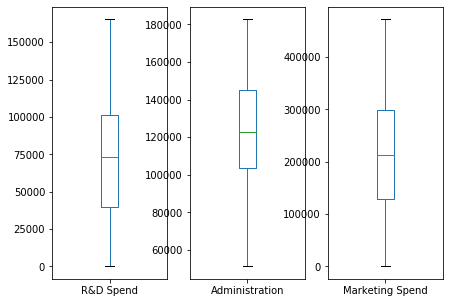

In [358]:
import matplotlib.pyplot as plt
box_df = df.iloc[:,[0,1,2]]
box_df.plot(kind='box', figsize= (7,5),subplots=True, layout=(1,3))
plt.show()

In [359]:
#Check and Handle categorical data
#State is the only categorical data that needs to be handled. Rest are numerica data
df.State.unique()
dfU = pd.concat([pd.get_dummies(df.State), df.iloc[:,[0,1,2,4]]] , axis = 1)
#pd.get_dummies(df.Pincode)
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [360]:
features = dfU.iloc[:,:-1].values
label = dfU.iloc[:,-1].values

### Let us start with PCA

In [361]:

# Rules/Guidelines:
# 1. Always perform Standardization if you are planning to do PCA (MANDATORY)
# 2. For PCA, n_components should be less than no of features
# 3. n_components can be judged using PN's Technique
#.   PN's Technique says that calc the principal component for n_components = n_features
#.   Count the number of components greater than equal to 75%. The same count will be your
#.   n_components

In [362]:
#Step1: Perform Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
ideal_sc = sc

In [363]:
#Step2: Identify the ideal number of components to work with
#PNs Technique
from sklearn.decomposition import PCA
principalComponents = PCA(n_components=6)  #Here n_components = len(features)
principalComponents.fit(features,label)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [364]:
#Lets get the ideal components (0.75 or later; else go with PC=1)
principalComponents.explained_variance_ratio_

array([3.26596913e-01, 2.51852089e-01, 2.16730846e-01, 1.68048197e-01,
       3.67719551e-02, 2.90831698e-33])

In [365]:

#Based on above variance of each components, we conclude to go for n_components = 1

In [366]:
#Step3: Apply PCA with correct number of components
from sklearn.decomposition import PCA
principalComponentsFinal = PCA(n_components=1)  
principalComponentsFinal.fit(features,label)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [367]:
principalComponentsFinal.explained_variance_ratio_

array([0.32659691])

In [368]:
#Step4: Transform the feature set
finalFeatures = principalComponentsFinal.transform(features)


## 1. Linear Regression

In [369]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


def determine_RS(features, label,model):
    max_val = -10
    max_train = -10
    ideal_model = None
    random_state = 0
    xtrain=xtest=ytrain=ytest = 0
    hit = 0 # This flag is fired when the test score is greater than train score
    #Since there are 50 records lets try iteration over 200
    for i in range(1,51):
        X_train,X_test,y_train,y_test = train_test_split(features,
                                                        label,
                                                        test_size=0.2,
                                                        random_state = i)


        model.fit(X_train,y_train)

        train_score = model.score(X_train,y_train)
        test_score = model.score(X_test,y_test)

        if test_score > train_score:
            hit = 1
            #print ("test %r " % test_score)
            #print ("max val %r " % max_val)
            if test_score > max_val:
                max_val = test_score
                ideal_model = model
                random_state = i
                max_train = train_score
                xtrain,xtest,ytrain,ytest = X_train,X_test,y_train,y_test
            print("Test: {} Train: {} RS: {}".format(test_score,train_score,i))
    print ("Ideal model inside %r " % (ideal_model))
    return [max_val,max_train, random_state, hit, ideal_model,xtrain,xtest,ytrain,ytest]
model = LinearRegression()
max_test_score_LR ,max_train_score_LR, random_state_LR, hit_LR ,ideal_model_LR,X_train_LR,X_test_LR,y_train_LR,y_test_LR= determine_RS(finalFeatures, label, model)

print ("Ideal %r"  %ideal_model_LR)

print ("The random state for the max test score  of %r is %r  " % (max_test_score_LR, random_state_LR))
if hit_LR:
    print ("Since test score is greater than train score this model is good")

Test: 0.6401699219533012 Train: 0.6379660973122546 RS: 1
Test: 0.6495662283829913 Train: 0.6393846499133367 RS: 3
Test: 0.7299723691319306 Train: 0.6176820798015509 RS: 6
Test: 0.6480117576825599 Train: 0.5894680723002407 RS: 8
Test: 0.6886747589957533 Train: 0.63359859270417 RS: 9
Test: 0.6925605371955526 Train: 0.6343891997263071 RS: 10
Test: 0.7563000224530768 Train: 0.6150585888690339 RS: 11
Test: 0.6478521291413639 Train: 0.6389935337641339 RS: 14
Test: 0.7819806699250693 Train: 0.6030945901184679 RS: 20
Test: 0.8594313761307419 Train: 0.5883921893573438 RS: 21
Test: 0.6416528158838661 Train: 0.6385542170077596 RS: 24
Test: 0.6925955570853268 Train: 0.6226675635764436 RS: 29
Test: 0.7688602666311564 Train: 0.5804159837102509 RS: 31
Test: 0.793594856359698 Train: 0.5873008932345786 RS: 32
Test: 0.8319991232828792 Train: 0.6031583130684616 RS: 33
Test: 0.6594611401147334 Train: 0.6219134555201589 RS: 39
Test: 0.7905100673005137 Train: 0.5533906255806452 RS: 40
Test: 0.72946028134927

In [370]:
print(ideal_model_LR.score(X_train_LR,y_train_LR))
print(ideal_model_LR.score(X_test_LR,y_test_LR))

0.5809130094832935
0.8768550668239933


###  Deployment without writing to Disk

In [371]:


R_and_D_spend = float(input("Enter R & D spend: "))
Admin = float(input("Enter Admininstration: "))
Marketing = float(input("Enter Marketing Spend: "))
State = input("Enter the state: ")

#Features 
def  compute_feature(R_and_D_spend,Admin,Marketing, State):
    if State == 'California':
        featureSet = np.array([[1,0,0,R_and_D_spend,Admin,Marketing,]])
        return featureSet
    elif State == 'Florida':
        featureSet = np.array([[0,1,0,R_and_D_spend,Admin,Marketing,]])
        return featureSet
    elif State == 'New York':
        print (R_and_D_spend)
        print (Admin)
        print (Marketing)
        featureSet = np.array([[0,0,1,R_and_D_spend,Admin,Marketing]])
        #print (featureSet)

        return featureSet
    else:
        State = input("Enter the right state:[ 'California', 'Florida', 'New York'] ")
        return compute_feature(R_and_D_spend,Admin,Marketing, State)
        
featureSet=compute_feature(R_and_D_spend,Admin,Marketing, State)        
#print (featureSet)

def predict_now(model):
    #Standardization

    fSetStandardized = sc.transform(featureSet)

    #Transform Feature to PCA component

    finalF = principalComponentsFinal.transform(fSetStandardized)

    #Predict

    print("Your Profit will be %r " % model.predict(finalF))
predict_now(ideal_model_LR)

Enter R & D spend: 


ValueError: could not convert string to float: 

In [330]:
#Deploy
# 1. model Object
# 2. StandardScaler Object
# 3. PCA object

In [331]:
# Print root mean squared error (RMSE) from Linear Regression.
#Creating a dataframe with test data and predicted output value
import math
PredictedProfit_LR = ideal_model_LR.predict(X_test_LR)
predict_dataset_LR = pd.DataFrame({'X_test_LR': list(X_test_LR), 'PredictedProfit_LR': list(PredictedProfit_LR)}, columns=['X_test_LR', 'PredictedProfit_LR'])
predict_dataset_LR



,X_test_LR,PredictedProfit_LR
0,[-2.213714795095182],159575.631532
1,[2.2053548373604532],60447.412476
2,[1.5029600471214999],76203.476630
3,[1.2125625751988283],82717.649658
4,[-1.8119603752772406],150563.508292
5,[-2.6938065376317053],170345.011374
6,[-1.1278176331763883],135216.872632
7,[0.5443926824723604],97705.983630
8,[-0.7802535001722678],127420.341602
9,[2.7192821471890958],48919.035875


### Root Mean Square Error

In [332]:
from sklearn.metrics import mean_squared_error
MSE_LR = mean_squared_error(y_test_LR, PredictedProfit_LR)
print ("Print root mean squared error (RMSE) from LR Model Tree based on all parameters is  %r " % math.sqrt(MSE_LR))
RMSE_LR =  math.sqrt(MSE_LR)

Print root mean squared error (RMSE) from LR Model Tree based on all parameters is  14783.4733608116 


###  Deployment  writing to Disk

In [372]:
#Deployment

#Persisting the model
#Package ---- pickle (Store and Load Memory Objects to/from disk respectively)

import pickle
pickle.dump(ideal_model_LR , open('ProfitPredictorLR','wb')) #Get the memory object and store it in a persistent file
pickle.dump(ideal_sc , open('StandardScaler','wb')) 
pickle.dump(principalComponentsFinal , open('principalComponentsFinal','wb'))

## 2.  Linear SVR

In [334]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
model = LinearSVR(random_state=9, tol=0.001)
import warnings
warnings.filterwarnings('ignore')
max_test_score_SVR ,max_train_score_SVR,random_state_SVR, hit_SVR ,ideal_model_SVR,X_train_SVR,X_test_SVR,y_train_SVR,y_test_SVR= determine_RS(finalFeatures, label, model)

print (ideal_model_SVR)
if max_test_score_SVR:
    print ("The random state for the max test score  of %r is %r  " % (max_test_score_SVR, random_state_SVR))
if hit:
    print ("Since test score is greater than train score this model is good")
else:
    print ("Linear SVR is not a good model")
print (ideal_model_SVR)

Test: -4.569087835343495 Train: -9.42911399565845 RS: 1
Test: -5.240942094719112 Train: -8.962868366318277 RS: 2
Test: -5.7628274510102715 Train: -8.724992230429091 RS: 3
Test: -5.452576037851747 Train: -8.844502987641558 RS: 6
Test: -3.652772003851857 Train: -10.714608762439383 RS: 8
Test: -6.557716140873875 Train: -8.279478691903256 RS: 10
Test: -6.272284312218492 Train: -8.430819667603721 RS: 11
Test: -7.261261545678606 Train: -8.257030562329296 RS: 12
Test: -7.118927233760757 Train: -8.325397862527305 RS: 14
Test: -6.184292995656259 Train: -9.661831454239607 RS: 18
Test: -6.762452893498362 Train: -8.205226239406954 RS: 21
Test: -7.200183325139657 Train: -8.27972119355018 RS: 26
Test: -5.0213735683576495 Train: -9.103681160790924 RS: 29
Test: -5.185519047031874 Train: -8.960164307981648 RS: 32
Test: -5.870604238336955 Train: -8.773108308205924 RS: 37
Test: -7.818812276120336 Train: -8.372066889447336 RS: 39
Test: -4.6928677194953154 Train: -9.833607049112375 RS: 40
Ideal model insid

### Deployment without writing to disk

In [335]:


R_and_D_spend = float(input("Enter R & D spend: "))
Admin = float(input("Enter Admininstration: "))
Marketing = float(input("Enter Marketing Spend: "))
State = input("Enter the state: ")
featureSet=compute_feature(R_and_D_spend,Admin,Marketing, State)

Enter R & D spend: 89
Enter Admininstration: 654
Enter Marketing Spend: 654
Enter the state: California


In [336]:
predict_now(ideal_model_SVR)



Your Profit will be array([36.39425401]) 


### Deployment writing to disk

In [346]:
#Deployment

#Persisting the model
#Package ---- pickle (Store and Load Memory Objects to/from disk respectively)

import pickle
pickle.dump(ideal_model_SVR , open('ProfitPredictorSVR','wb')) #Get the memory object and store it in a persistent file


In [ ]:
#Deploy
# 1. model Object
# 2. StandardScaler Object
# 3. PCA object

In [339]:
# Print root mean squared error (RMSE) from Linear Regression.
#Creating a dataframe with test data and predicted output value
import math
PredictedProfit_SVR = ideal_model_SVR.predict(X_test_SVR)
predict_dataset_SVR = pd.DataFrame({'X_test_SVR': list(X_test_SVR), 'PredictedProfit_SVR': list(PredictedProfit_SVR)}, columns=['X_test_SVR', 'PredictedProfit_SVR'])
predict_dataset_SVR


,X_test_SVR,PredictedProfit_SVR
0,[2.2053548373604532],37.647234
1,[2.592647645291922],37.234053
2,[-0.23969686592628459],40.255719
3,[-1.1278176331763883],41.203204
4,[2.2374216126726587],37.613023
5,[-1.2869706782609602],41.372995
6,[-0.5273403615650528],40.562589
7,[-2.5497373889745663],42.720168
8,[-0.7802535001722678],40.832408
9,[1.8652324516758994],38.010091


### Root Mean Square Error

In [342]:
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test_SVR, PredictedProfit)
print ("Print root mean squared error (RMSE) from LR Model Tree based on all parameters is  %r " % math.sqrt(MSE_SVR))
RMSE_SVR = math.sqrt(MSE_SVR)

Print root mean squared error (RMSE) from LR Model Tree based on all parameters is  62742.362360145285 


## 3. Random Forest Regressor

In [343]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
max_test_score_RF ,max_train_score_RF, random_state_RF, hit_RF ,ideal_model_RF,X_train_RF,X_test_RF,y_train_RF,y_test_RF= determine_RS(finalFeatures, label, model)

if  random_state_RF!= 0:
    print ("The random state for the max test score  of %r is %r  " % (max_test_score_RF, random_state_RF))
if hit:
    print ("Since test score is greater than train score this model is good")
else:
    print ("Random Forest is not a good model")

Ideal model inside None 
Random Forest is not a good model


In [344]:
data = {'Model':['RS','Test Score ' ,'Train Score' ,' Model is good', 'RMSE'],
        'Linear Regression':[random_state_LR, max_test_score_LR,max_train_score_LR, 'Yes',RMSE_LR ],
        'Linear SVR' :[random_state_SVR, max_test_score_SVR,max_train_score_SVR, 'Yes',RMSE_SVR],
        'Random Forest':['NA',0.802,  0.9230,'No', 'NA']}
 
# Create DataFrame
df = pd.DataFrame(data)

### Conclusion: PCA for all three models

In [345]:
df

,Model,Linear Regression,Linear SVR,Random Forest
0,RS,21,8,NA
1,Test Score,0.859431,-3.65277,0.802
2,Train Score,0.588392,-10.7146,0.923
3,Model is good,Yes,Yes,No
4,RMSE,14783.5,62742.4,NA
